In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
import scipy.stats as stat
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import pickle
import os

In [2]:
os.chdir("C:\\Users\\Riya\\Documents\\Codesoft\\Customer Churn Prediction\\Customer-Churn-Prediction")
df = pd.read_csv("CCP_FS.csv")
df

,Geography,Gender,Age,Balance,IsActiveMember,Exited
0,France,Female,42.0,0.00,1,1
1,Spain,Female,41.0,83807.86,1,0
2,France,Female,42.0,159660.80,0,1
3,France,Female,39.0,0.00,0,0
4,Spain,Female,43.0,125510.82,1,0
...,...,...,...,...,...,...
9995,France,Male,39.0,0.00,0,0
9996,France,Male,35.0,57369.61,1,0
9997,France,Female,36.0,0.00,1,1
9998,Germany,Male,42.0,75075.31,0,1


### Encoding Categorical Variables

Geography Variable

In [3]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [4]:
ohe_df = pd.get_dummies(df['Geography'])
ohe_df.drop(['Germany'], axis=1, inplace=True)

In [5]:
ohe_df

,France,Spain
0,True,False
1,False,True
2,True,False
3,True,False
4,False,True
...,...,...
9995,True,False
9996,True,False
9997,True,False
9998,False,False


In [6]:
df = pd.concat([df, ohe_df], axis=1)
df.drop(['Geography'], axis=1, inplace=True)
df

,Gender,Age,Balance,IsActiveMember,Exited,France,Spain
0,Female,42.0,0.00,1,1,True,False
1,Female,41.0,83807.86,1,0,False,True
2,Female,42.0,159660.80,0,1,True,False
3,Female,39.0,0.00,0,0,True,False
4,Female,43.0,125510.82,1,0,False,True
...,...,...,...,...,...,...,...
9995,Male,39.0,0.00,0,0,True,False
9996,Male,35.0,57369.61,1,0,True,False
9997,Female,36.0,0.00,1,1,True,False
9998,Male,42.0,75075.31,0,1,False,False


### Gender Variable

In [7]:
le = LabelEncoder()
df['Gender_le'] = le.fit_transform(df['Gender'])

In [8]:
pickle.dump(le, open('gender_le.pkl','wb'))

In [9]:
df.drop(['Gender'], axis=1, inplace=True)

In [10]:
df

,Age,Balance,IsActiveMember,Exited,France,Spain,Gender_le
0,42.0,0.00,1,1,True,False,0
1,41.0,83807.86,1,0,False,True,0
2,42.0,159660.80,0,1,True,False,0
3,39.0,0.00,0,0,True,False,0
4,43.0,125510.82,1,0,False,True,0
...,...,...,...,...,...,...,...
9995,39.0,0.00,0,0,True,False,1
9996,35.0,57369.61,1,0,True,False,1
9997,36.0,0.00,1,1,True,False,0
9998,42.0,75075.31,0,1,False,False,1


### Seperating dependent and independent variables

In [11]:
df_Y = df['Exited']
df_Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [12]:
df_X = df.iloc[:,[0,1,2,4,5,6]]
df_X

,Age,Balance,IsActiveMember,France,Spain,Gender_le
0,42.0,0.00,1,True,False,0
1,41.0,83807.86,1,False,True,0
2,42.0,159660.80,0,True,False,0
3,39.0,0.00,0,True,False,0
4,43.0,125510.82,1,False,True,0
...,...,...,...,...,...,...
9995,39.0,0.00,0,True,False,1
9996,35.0,57369.61,1,True,False,1
9997,36.0,0.00,1,True,False,0
9998,42.0,75075.31,0,False,False,1


### Scaling the dataset

In [13]:
scaler = StandardScaler()
df_X_scaled = pd.DataFrame(scaler.fit_transform(df_X),columns=df_X.columns)

In [14]:
pickle.dump(scaler, open('slr.pkl','wb'))

In [15]:
df_X_scaled

,Age,Balance,IsActiveMember,France,Spain,Gender_le
0,0.482051,-1.225848,0.970243,0.997204,-0.573809,-1.095988
1,0.366388,0.117350,0.970243,-1.002804,1.742740,-1.095988
2,0.482051,1.333053,-1.030670,0.997204,-0.573809,-1.095988
3,0.135061,-1.225848,-1.030670,0.997204,-0.573809,-1.095988
4,0.597715,0.785728,0.970243,-1.002804,1.742740,-1.095988
...,...,...,...,...,...,...
9995,0.135061,-1.225848,-1.030670,0.997204,-0.573809,0.912419
9996,-0.327593,-0.306379,0.970243,0.997204,-0.573809,0.912419
9997,-0.211929,-1.225848,0.970243,0.997204,-0.573809,-1.095988
9998,0.482051,-0.022608,-1.030670,-1.002804,-0.573809,0.912419


In [16]:
df_scaled = pd.concat([df_X_scaled, df_Y], axis=1)

In [17]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist(color="MEDIUMVIOLETRED")
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show

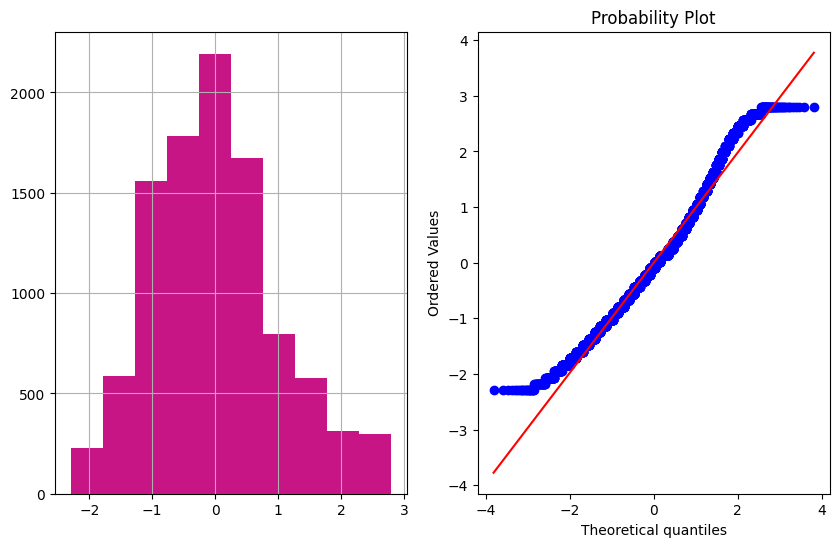

In [18]:
plot_data(df_X_scaled,'Age')

### Exporting Transformed Dataset

In [19]:
df_scaled.to_csv('CCP_FT.csv', encoding='utf-8', index=False)